# Laptop Price Predictor

### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choose Best Model

# 1) Problem Satement

This project understands how the price of a laptop (Price) is affected by certain components such as RAM, Company, Type, Resolution, etc. Goal is to determine what constitutes to a laptop price in order to help students, gamers, coders and everyone to find the perfect laptop for their needs and budget. 

2) Data Collection
The data consists of 1303 Rows and 13 columns
Features: laptop_ID, Company, Product, TypeName, Inches, ScreenResolution, Cpu,	Ram, Memory, Gpu, OpSys, Weight

Target variable: Price_euros

## Importing Pandas, Numpy, Matplotlib, Seaborn for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2) Data Collection

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.shape

(1303, 13)

## 3) Data Checks 

In [4]:
# No Null Values Found
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### 28 Duplicates found

In [5]:
df.duplicated().sum()


0

In [6]:
df[df.duplicated()].sort_values(['Product', 'Price_euros'], ascending = False).head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


In [7]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
print(df.shape)
print(df.duplicated().sum())

(1303, 13)
0


In [8]:
df.drop(columns = 'laptop_ID', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


# Exploratory Data Analysis

In [10]:
for column in df.columns:
    if df[column].nunique() < 10:
        print('The amount number of unique values for the {} column is {} -- {}'.format(column,df[column].nunique(),df[column].unique()))
    else:
        print('The amount number of unique values for the {} column is {}'.format(column,df[column].nunique()))

The amount number of unique values for the Company column is 19
The amount number of unique values for the Product column is 618
The amount number of unique values for the TypeName column is 6 -- ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
The amount number of unique values for the Inches column is 18
The amount number of unique values for the ScreenResolution column is 40
The amount number of unique values for the Cpu column is 118
The amount number of unique values for the Ram column is 9 -- ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
The amount number of unique values for the Memory column is 39
The amount number of unique values for the Gpu column is 110
The amount number of unique values for the OpSys column is 9 -- ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
The amount number of unique values for the Weight column is 179
The amount number of unique values for the Price_eur

In [11]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


## Insight
- On paper we only have two true numerical values (inches and floats). However there looks to be more numerical values such as cpu giga hertz, Ram, Memory, and Weight that can be converted
- Have extreme outleirs for Price_euros column
- Right skewed outlier typically reside in Gaming Laptops. Windows 10 Laptops have a high frequency with values outside the third quartile

<Axes: xlabel='Company'>

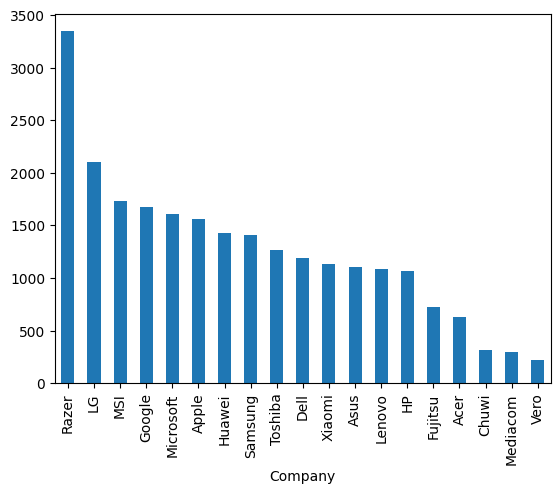

In [12]:
df.groupby('Company').mean()['Price_euros'].sort_values(ascending = False).plot(kind = 'bar')
# On average Razer has the highest 

In [13]:
df['Weight'] = df['Weight'].str.rstrip('kg')
df['Weight'] = df['Weight'].astype('float')

<Axes: xlabel='Weight', ylabel='Price_euros'>

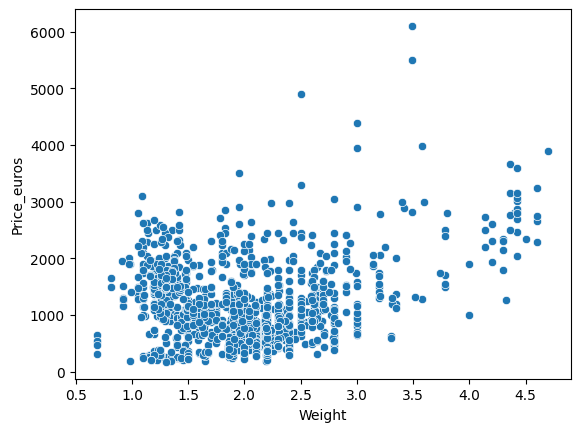

In [14]:
sns.scatterplot(data = df, x = 'Weight', y ='Price_euros')
# Weak ass correlation

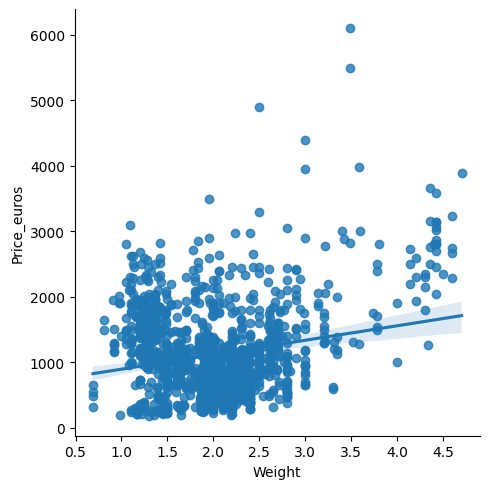

In [15]:
sns.lmplot(data = df, x = 'Weight', y = 'Price_euros')
# plotting is a little bit hetreoscedastic, but general upward but weak trend

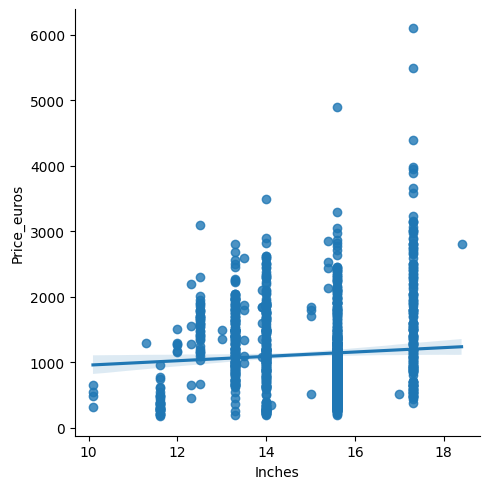

In [16]:
sns.lmplot(data = df, x = 'Inches', y = 'Price_euros')


<Axes: xlabel='Ram', ylabel='Price_euros'>

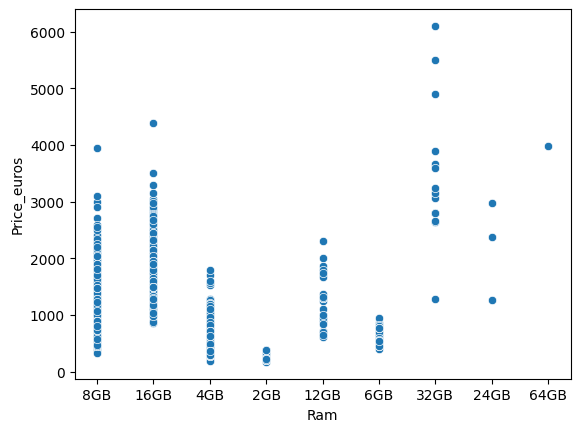

In [17]:
sns.scatterplot(data = df, x = 'Ram', y= 'Price_euros')
# Problem is that the x variables are categorical and the computer doesn't know they are ordinal and have an order

In [18]:
df['Ram'] = df['Ram'].str.rstrip('GB')

In [19]:
df['Ram'].dtype

dtype('O')

In [20]:
df['Ram'].unique()

Ram_ordered = ['2','4','6','8','12', '16','24','32','64']

In [21]:
print(pd.Categorical(df['Ram'], categories=Ram_ordered, ordered = True))
# This code is basically telling the computer that there is an order between these cateogrical variables 
# making them ordinal
df['Ram'] = pd.Categorical(df['Ram'], categories=Ram_ordered, ordered = True)

['8', '8', '8', '16', '8', ..., '4', '16', '2', '6', '4']
Length: 1303
Categories (9, object): ['2' < '4' < '6' < '8' ... '16' < '24' < '32' < '64']


<Axes: xlabel='Ram', ylabel='Price_euros'>

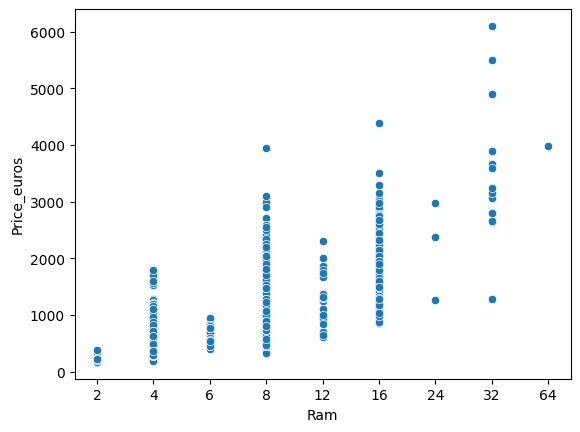

In [22]:
#sns.scatterplot(data = df, x = 'Ram', y = 'Price_euros')
sns.scatterplot(data = df, x = 'Ram', y = 'Price_euros')


In [23]:
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

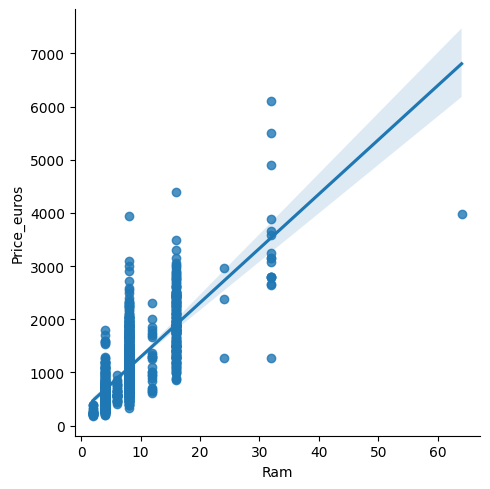

In [24]:
sns.lmplot(data = df, x = 'Ram', y = 'Price_euros')

In [25]:
order_typename = df.groupby('TypeName').mean()['Price_euros'].sort_values(ascending = True).index
print(order_typename)



Index(['Netbook', 'Notebook', '2 in 1 Convertible', 'Ultrabook', 'Gaming',
       'Workstation'],
      dtype='object', name='TypeName')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Netbook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, '2 in 1 Convertible'),
  Text(3, 0, 'Ultrabook'),
  Text(4, 0, 'Gaming'),
  Text(5, 0, 'Workstation')])

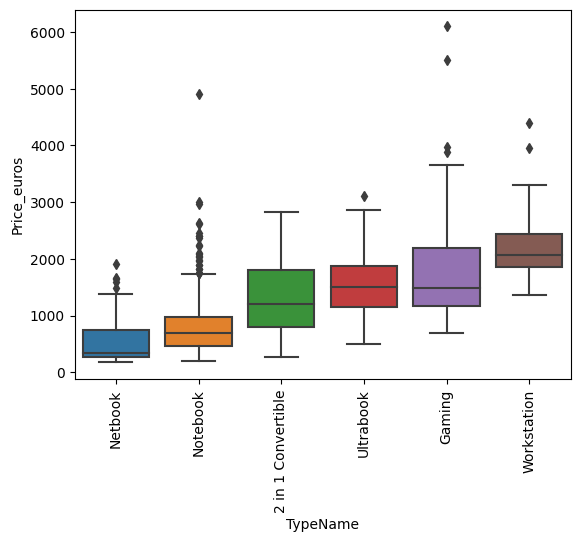

In [26]:
# There is some upward ordinal trend
sns.boxplot(data = df, x = 'TypeName', y = 'Price_euros', order = order_typename)
plt.xticks(rotation = 90)


<Axes: xlabel='Ram', ylabel='Price_euros'>

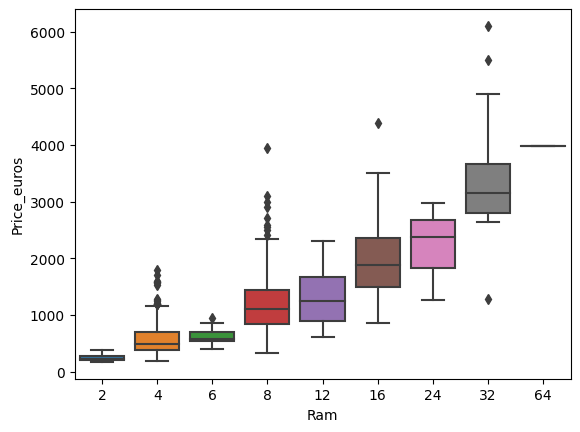

In [27]:
sns.boxplot(data = df, x = 'Ram', y = 'Price_euros')

In [28]:
order_Opsys = df.groupby('OpSys').mean()['Price_euros'].sort_values(ascending = True).index

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Chrome OS'),
  Text(2, 0, 'No OS'),
  Text(3, 0, 'Linux'),
  Text(4, 0, 'Windows 10'),
  Text(5, 0, 'Mac OS X'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Windows 7'),
  Text(8, 0, 'macOS')])

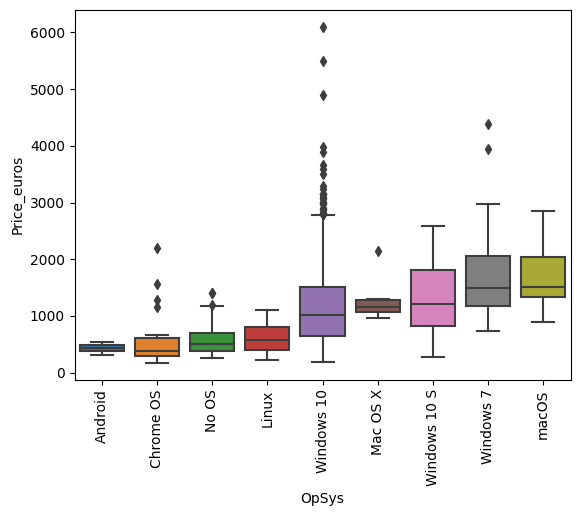

In [29]:
sns.boxplot(data = df, x = 'OpSys', y = 'Price_euros', order = order_Opsys)
plt.xticks(rotation = 90)

In [30]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [31]:
y = df.iloc[:, -1]
x = df.iloc[:, :-1]

In [32]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

## Feature Engineering From text data

In [33]:
# IPS
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

# 4K column 
df['4K'] = df['ScreenResolution'].apply(lambda x: 1 if '4K' in x else 0)

# Monitor resolution with just the numbers
df['4K'].value_counts()

# Touchscreen 
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# Resolution
df['Resolution'] = df['ScreenResolution'].str.split().str[-1]

In [34]:
df.drop(columns = 'ScreenResolution', inplace = True)

In [35]:
df.corr()

,Inches,Ram,Weight,Price_euros,IPS,4K,Touchscreen
Inches,1.000000,0.237993,0.827631,0.068197,-0.114804,0.015249,-0.361735
Ram,0.237993,1.000000,0.383874,0.743007,0.206623,0.273494,0.116984
Weight,0.827631,0.383874,1.000000,0.210370,0.016967,0.055570,-0.294620
Price_euros,0.068197,0.743007,0.210370,1.000000,0.252208,0.343982,0.191226
IPS,-0.114804,0.206623,0.016967,0.252208,1.000000,0.123938,0.150512
4K,0.015249,0.273494,0.055570,0.343982,0.123938,1.000000,0.214093
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,0.150512,0.214093,1.000000


In [36]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [37]:
# Featuring Engineering the Cpu

In [38]:
df['Processor'] = df['Cpu'].str.split().str[0]

In [39]:
df['Processor'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [40]:
df['Ghz'] = df['Cpu'].str.split().str[-1]

In [41]:
df['Ghz'] = df['Ghz'].str.rstrip('GHz')
df['Ghz'] = df['Ghz'].astype('float')

In [42]:
df['Gpu_Brand'] = df['Gpu'].str.split().str[0]

In [43]:
# Feature Engineering Resolution

In [44]:
resolution_ordered = ['1366x768', '1440x900', '1600x900', '1920x1080', '1920x1200', '2160x1440', '2256x1504', '2304x1440', '2400x1600', '2560x1440', '2560x1600', '2736x1824', '2880x1800', '3200x1800', '3840x2160']

In [45]:
print(pd.Categorical(df['Resolution'], categories=resolution_ordered, ordered = True))
# This code is basically telling the computer that there is an order between these cateogrical variables 
# making them ordinal
df['Resolution'] = pd.Categorical(df['Resolution'], categories=resolution_ordered, ordered = True)

['2560x1600', '1440x900', '1920x1080', '2880x1800', '2560x1600', ..., '1920x1080', '3200x1800', '1366x768', '1366x768', '1366x768']
Length: 1303
Categories (15, object): ['1366x768' < '1440x900' < '1600x900' < '1920x1080' ... '2736x1824' < '2880x1800' < '3200x1800' < '3840x2160']


<Axes: xlabel='Resolution'>

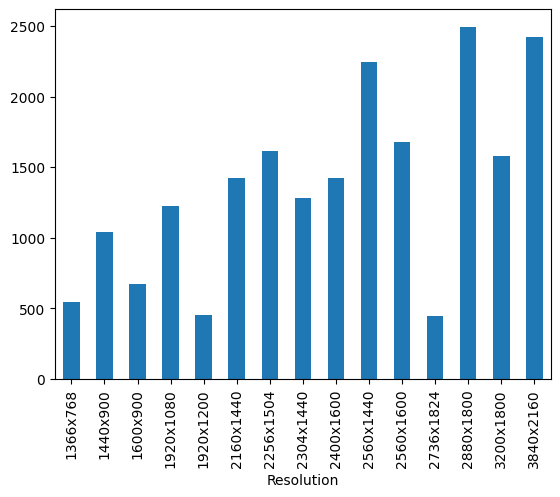

In [46]:
df.groupby('Resolution').mean()['Price_euros'].plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1366x768'),
  Text(1, 0, '1440x900'),
  Text(2, 0, '1600x900'),
  Text(3, 0, '1920x1080'),
  Text(4, 0, '1920x1200'),
  Text(5, 0, '2160x1440'),
  Text(6, 0, '2256x1504'),
  Text(7, 0, '2304x1440'),
  Text(8, 0, '2400x1600'),
  Text(9, 0, '2560x1440'),
  Text(10, 0, '2560x1600'),
  Text(11, 0, '2736x1824'),
  Text(12, 0, '2880x1800'),
  Text(13, 0, '3200x1800'),
  Text(14, 0, '3840x2160')])

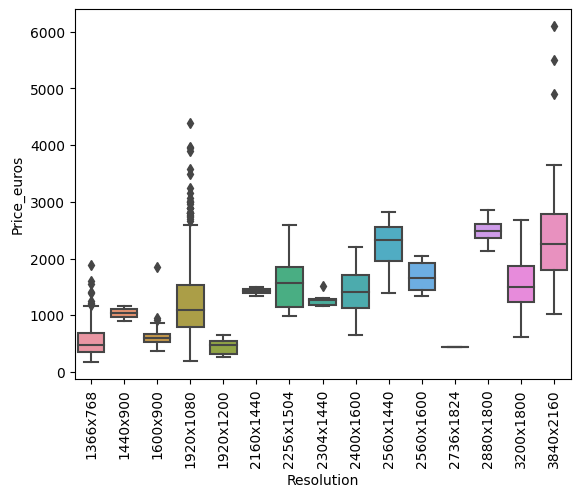

In [47]:
sns.boxplot(data = df, x = 'Resolution', y='Price_euros')
plt.xticks(rotation = 90)
# The means of the resulotions has a positive linear trend

In [48]:
df['Memory'] = df['Memory'].str.split().str[0]

In [49]:
print(df['Memory'].unique())
df['Memory'] = df['Memory'].replace('1.0TB', '1TB')
print(df['Memory'].unique())

['128GB' '256GB' '512GB' '500GB' '1TB' '32GB' '64GB' '2TB' '1.0TB' '16GB'
 '180GB' '240GB' '8GB' '508GB']
['128GB' '256GB' '512GB' '500GB' '1TB' '32GB' '64GB' '2TB' '16GB' '180GB'
 '240GB' '8GB' '508GB']


In [50]:
memory_ordered = ['8GB', '16GB', '32GB', '64GB', '128GB', '180GB', '240GB', '256GB', '500GB', '508GB', '512GB', '1TB', '2TB']
print(pd.Categorical(df['Memory'], categories = memory_ordered, ordered = True))

df['Memory'] = pd.Categorical(df['Memory'], categories = memory_ordered, ordered = True)

['128GB', '128GB', '256GB', '512GB', '256GB', ..., '128GB', '512GB', '64GB', '1TB', '500GB']
Length: 1303
Categories (13, object): ['8GB' < '16GB' < '32GB' < '64GB' ... '508GB' < '512GB' < '1TB' < '2TB']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '8GB'),
  Text(1, 0, '16GB'),
  Text(2, 0, '32GB'),
  Text(3, 0, '64GB'),
  Text(4, 0, '128GB'),
  Text(5, 0, '180GB'),
  Text(6, 0, '240GB'),
  Text(7, 0, '256GB'),
  Text(8, 0, '500GB'),
  Text(9, 0, '508GB'),
  Text(10, 0, '512GB'),
  Text(11, 0, '1TB'),
  Text(12, 0, '2TB')])

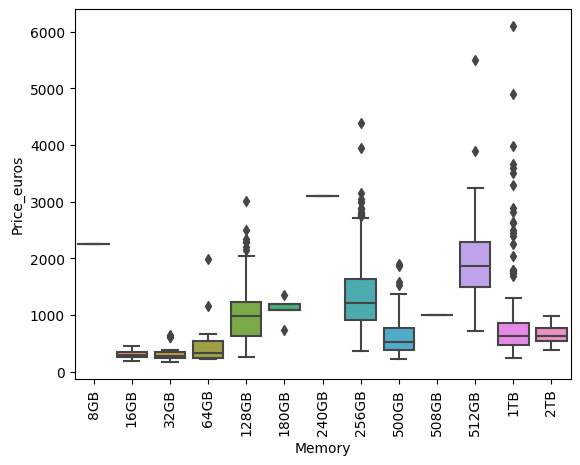

In [51]:
sns.boxplot(data = df, x = 'Memory', y = 'Price_euros')
plt.xticks(rotation = 90)


In [52]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,IPS,4K,Touchscreen,Resolution,Processor,Ghz,Gpu_Brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,0,0,2560x1600,Intel,2.3,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,1440x900,Intel,1.8,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1920x1080,Intel,2.5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB,AMD Radeon Pro 455,macOS,1.83,2537.45,1,0,0,2880x1800,Intel,2.7,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,0,0,2560x1600,Intel,3.1,Intel


In [53]:
modeldf = df.drop(columns = ['Product','Cpu', 'Gpu'])
modeldf.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,IPS,4K,Touchscreen,Resolution,Processor,Ghz,Gpu_Brand
0,Apple,Ultrabook,13.3,8,128GB,macOS,1.37,1339.69,1,0,0,2560x1600,Intel,2.3,Intel
1,Apple,Ultrabook,13.3,8,128GB,macOS,1.34,898.94,0,0,0,1440x900,Intel,1.8,Intel
2,HP,Notebook,15.6,8,256GB,No OS,1.86,575.00,0,0,0,1920x1080,Intel,2.5,Intel
3,Apple,Ultrabook,15.4,16,512GB,macOS,1.83,2537.45,1,0,0,2880x1800,Intel,2.7,AMD
4,Apple,Ultrabook,13.3,8,256GB,macOS,1.37,1803.60,1,0,0,2560x1600,Intel,3.1,Intel


In [54]:
Categorical_Variables = ['Company', 'TypeName', 'OpSys', 'Processor', 'Gpu_Brand']

for x in Categorical_Variables:
    print("The number of unique values in {} is {}".format(x, modeldf[x].nunique()))
    
# Since the data size is fairly small, cardinality can cause some problems in the dataset
# It may just be best to convert all the categorical varaibles into frequency ordinal counts
print(modeldf.shape)

The number of unique values in Company is 19
The number of unique values in TypeName is 6
The number of unique values in OpSys is 9
The number of unique values in Processor is 3
The number of unique values in Gpu_Brand is 4
(1303, 15)


# 5) Data Pre Processing

### Encoding via frequency

In [55]:
# First creating the frequency counts 
companydict = modeldf.Company.value_counts().to_dict()
print(companydict)
# Mapping the freqencies taking place of the categorical word
modeldf['company_encoding'] = modeldf['Company'].map(companydict)

typenamedict = modeldf.TypeName.value_counts().to_dict()
modeldf['typename_encoding'] = modeldf['TypeName'].map(typenamedict)

opsysdict = modeldf.OpSys.value_counts().to_dict()
modeldf['opsys_encoding'] = modeldf['OpSys'].map(opsysdict)

processordict = modeldf.Processor.value_counts().to_dict()
modeldf['processor_encoding'] = modeldf['Processor'].map(processordict)

gpudict = modeldf.Gpu_Brand.value_counts().to_dict()
modeldf['gpu_encoding'] = modeldf['Gpu_Brand'].map(gpudict)

# Encoding the Ordinal Variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
modeldf['Resolution'] = label_encoder.fit_transform(modeldf['Resolution'])
modeldf['Memory'] = label_encoder.fit_transform(modeldf['Memory'])

{'Dell': 297, 'Lenovo': 297, 'HP': 274, 'Asus': 158, 'Acer': 103, 'MSI': 54, 'Toshiba': 48, 'Apple': 21, 'Samsung': 9, 'Razer': 7, 'Mediacom': 7, 'Microsoft': 6, 'Xiaomi': 4, 'Vero': 4, 'Chuwi': 3, 'Google': 3, 'Fujitsu': 3, 'LG': 3, 'Huawei': 2}


In [56]:
# Encoding the Ordinal Variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
modeldf['Resolution'] = label_encoder.fit_transform(modeldf['Resolution'])
modeldf['Memory'] = label_encoder.fit_transform(modeldf['Memory'])

### Encoding via Average Ordinal

In [57]:
# order_OpSys = modeldf.groupby('OpSys')['Price_euros'].mean().sort_values().index
# ordinal_mapping = {os: code for code, os in enumerate(order_OpSys)}
# modeldf['opsys_encoding'] = modeldf['OpSys'].map(ordinal_mapping)

# order_TypeName = modeldf.groupby('TypeName')['Price_euros'].mean().sort_values().index
# ordinal_mapping = {os: code for code, os in enumerate(order_TypeName)}
# modeldf['typename_encoding'] = modeldf['TypeName'].map(ordinal_mapping)

# order_processor = modeldf.groupby('Processor')['Price_euros'].mean().sort_values().index
# ordinal_mapping = {os: code for code, os in enumerate(order_processor)}
# modeldf['processor_encoding'] = modeldf['Processor'].map(ordinal_mapping)

# order_gpu = modeldf.groupby('Gpu_Brand')['Price_euros'].mean().sort_values().index
# ordinal_mapping = {os: code for code, os in enumerate(order_gpu)}
# modeldf['gpu_encoding'] = modeldf['Gpu_Brand'].map(ordinal_mapping)

# order_company = modeldf.groupby('Company')['Price_euros'].mean().sort_values().index
# ordinal_mapping = {os: code for code, os in enumerate(order_company)}
# modeldf['company_encoding'] = modeldf['Company'].map(ordinal_mapping)


In [58]:
modeldf.corr()

,Inches,Ram,Memory,Weight,Price_euros,IPS,4K,Touchscreen,Resolution,Ghz,company_encoding,typename_encoding,opsys_encoding,processor_encoding,gpu_encoding
Inches,1.000000,0.237993,-0.212605,0.827631,0.068197,-0.114804,0.015249,-0.361735,-0.112147,0.307870,0.027613,0.279085,0.095680,-0.121545,-0.533612
Ram,0.237993,1.000000,0.148880,0.383874,0.743007,0.206623,0.273494,0.116984,0.407572,0.368000,-0.081704,-0.384507,0.148884,0.107120,-0.212680
Memory,-0.212605,0.148880,1.000000,-0.198349,0.189075,0.051516,0.091166,0.151950,0.143744,-0.076661,-0.013467,-0.135245,-0.004286,0.005857,0.179607
Weight,0.827631,0.383874,-0.198349,1.000000,0.210370,0.016967,0.055570,-0.294620,-0.074336,0.320434,0.036518,0.062505,0.087339,-0.057091,-0.500621
Price_euros,0.068197,0.743007,0.189075,0.210370,1.000000,0.252208,0.343982,0.191226,0.539797,0.430293,-0.060304,-0.531882,0.133890,0.181097,-0.068646
IPS,-0.114804,0.206623,0.051516,0.016967,0.252208,1.000000,0.123938,0.150512,0.276508,0.063035,-0.031619,-0.299414,0.081116,0.084466,0.010450
4K,0.015249,0.273494,0.091166,0.055570,0.343982,0.123938,1.000000,0.214093,0.652761,0.067503,0.039663,-0.113979,0.063160,0.041639,-0.038459
Touchscreen,-0.361735,0.116984,0.151950,-0.294620,0.191226,0.150512,0.214093,1.000000,0.369908,-0.082579,0.056964,-0.416752,0.076649,0.083093,0.249178
Resolution,-0.112147,0.407572,0.143744,-0.074336,0.539797,0.276508,0.652761,0.369908,1.000000,0.153852,0.011870,-0.335560,0.053269,0.093276,-0.011293
Ghz,0.307870,0.368000,-0.076661,0.320434,0.430293,0.063035,0.067503,-0.082579,0.153852,1.000000,0.030006,-0.160777,0.146788,-0.138868,-0.293845


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Inches'),
  Text(0, 1.5, 'Ram'),
  Text(0, 2.5, 'Memory'),
  Text(0, 3.5, 'Weight'),
  Text(0, 4.5, 'Price_euros'),
  Text(0, 5.5, 'IPS'),
  Text(0, 6.5, '4K'),
  Text(0, 7.5, 'Touchscreen'),
  Text(0, 8.5, 'Resolution'),
  Text(0, 9.5, 'Ghz'),
  Text(0, 10.5, 'company_encoding'),
  Text(0, 11.5, 'typename_encoding'),
  Text(0, 12.5, 'opsys_encoding'),
  Text(0, 13.5, 'processor_encoding'),
  Text(0, 14.5, 'gpu_encoding')])

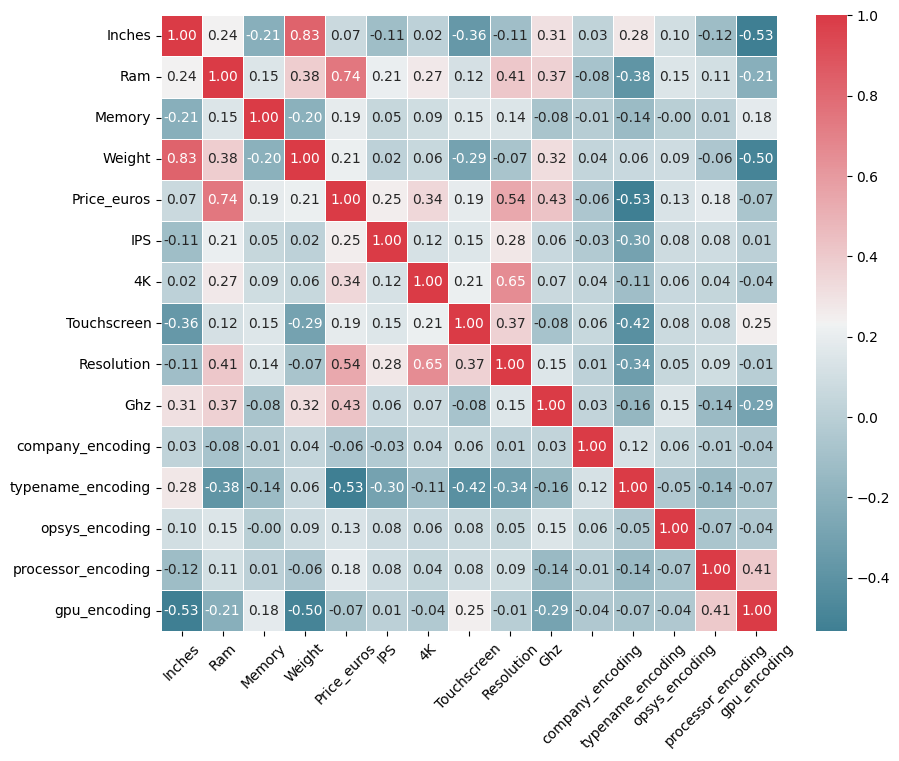

In [59]:
#sns.heatmap(modeldf.corr(), annot = True)
plt.figure(figsize=(10, 8))

# Modify the color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Rotate axis labels
sns.heatmap(modeldf.corr(), annot=True, cmap=cmap, square=True, fmt=".2f", linewidths=0.5, xticklabels=True, yticklabels=True)

# Increase font size
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)


# Pearson Correlation feature engineering

In [60]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]> threshold):
                colname = corr_matrix.columns [i]
                col_corr.add(colname)
    return col_corr

In [61]:
correlation(modeldf, 0.8)
# We can see that Weight is highly created with Inches
# Decide whether to use Weight vs Inches
# Probably use inches from a domain logic perspective

{'Weight'}

<Axes: xlabel='Weight', ylabel='Price_euros'>

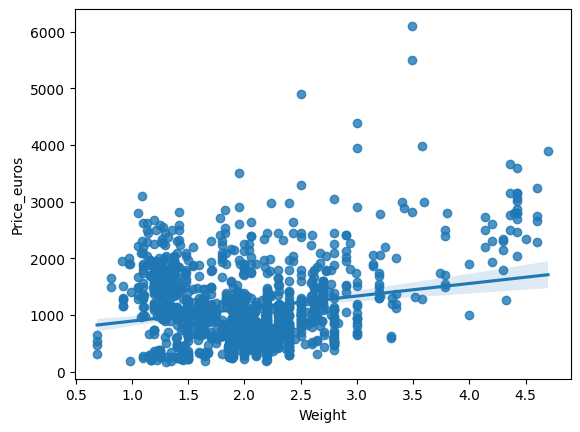

In [62]:
sns.regplot(x='Weight', y = 'Price_euros', data = modeldf)

<Axes: xlabel='Ram', ylabel='Price_euros'>

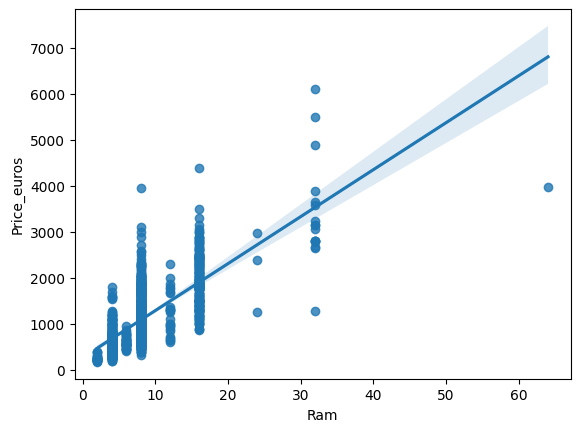

In [63]:
sns.regplot(x='Ram', y = 'Price_euros', data = modeldf)

<Axes: xlabel='Ghz', ylabel='Price_euros'>

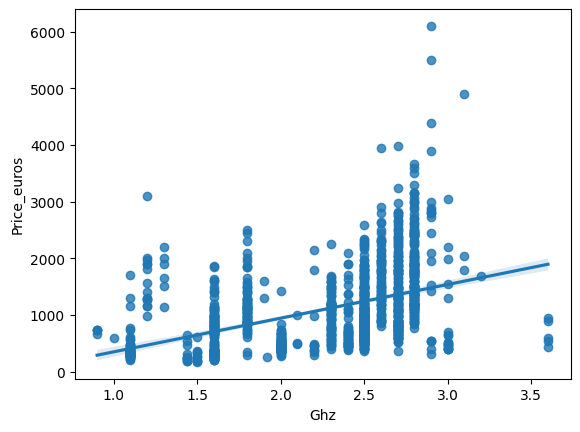

In [64]:
sns.regplot(x='Ghz', y = 'Price_euros', data = modeldf)

<Axes: xlabel='Memory', ylabel='Price_euros'>

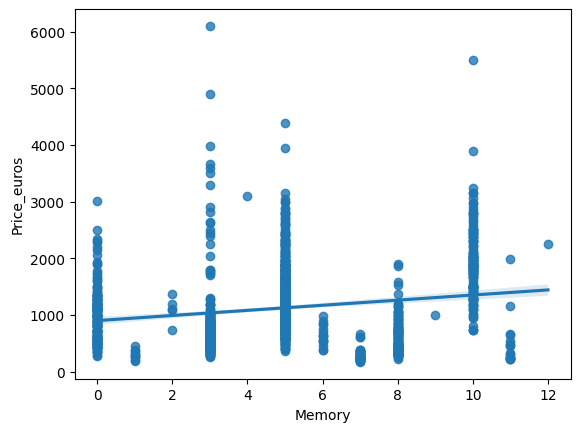

In [65]:
sns.regplot(x='Memory', y = 'Price_euros', data = modeldf)

<Axes: xlabel='Inches', ylabel='Price_euros'>

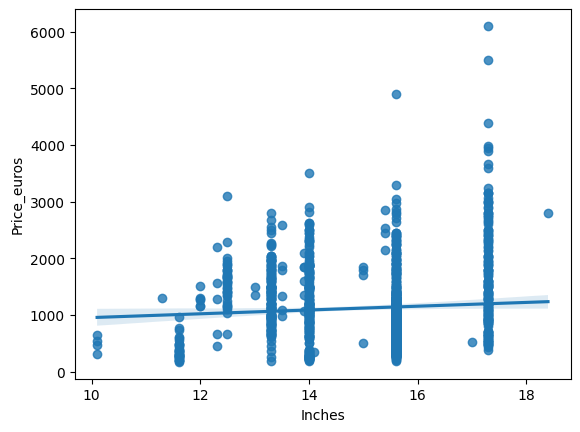

In [66]:
sns.regplot(x='Inches', y = 'Price_euros', data = modeldf)

In [67]:
X = modeldf.drop(columns = ['Company', 'TypeName','OpSys','Processor','Gpu_Brand','Price_euros','Weight','Inches','Touchscreen'])
X

,Ram,Memory,IPS,4K,Resolution,Ghz,company_encoding,typename_encoding,opsys_encoding,processor_encoding,gpu_encoding
0,8,0,1,0,10,2.3,21,196,13,1240,722
1,8,0,0,0,1,1.8,21,196,13,1240,722
2,8,5,0,0,3,2.5,274,727,66,1240,722
3,16,10,1,0,12,2.7,21,196,13,1240,180
4,8,5,1,0,10,3.1,21,196,13,1240,722
...,...,...,...,...,...,...,...,...,...,...,...
1298,4,0,1,0,3,2.5,297,121,1072,1240,722
1299,16,10,1,0,13,2.5,297,121,1072,1240,722
1300,2,11,0,0,0,1.6,297,727,1072,1240,722
1301,6,3,0,0,0,2.5,274,727,1072,1240,180


In [68]:
y = modeldf.iloc[:,7]
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
## standardizing the data
# Important for gradient descent 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [71]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.05768636,  0.02700709,  1.57268348, ...,  0.44298716,
         0.23377995,  0.84625232],
       [-0.05768636, -0.66784192,  1.57268348, ...,  0.44298716,
         0.23377995,  0.84625232],
       [-0.86997269,  1.0692806 , -0.63585586, ..., -2.2089653 ,
         0.23377995,  0.84625232],
       ...,
       [-1.27611585,  0.7218561 , -0.63585586, ...,  0.44298716,
         0.23377995,  0.84625232],
       [-0.05768636, -1.71011544, -0.63585586, ...,  0.44298716,
         0.23377995, -0.70983646],
       [-0.86997269, -1.71011544, -0.63585586, ...,  0.44298716,
         0.23377995,  0.84625232]])

In [72]:
X_test = scaler.transform(X_test)
X_test

array([[-0.86997269, -0.66784192, -0.63585586, ...,  0.44298716,
         0.23377995,  0.84625232],
       [-0.05768636,  1.76412962,  1.57268348, ...,  0.44298716,
         0.23377995, -0.70983646],
       [ 1.56688629,  0.02700709, -0.63585586, ...,  0.44298716,
         0.23377995,  0.84625232],
       ...,
       [-0.05768636,  1.76412962,  1.57268348, ...,  0.44298716,
         0.23377995,  0.84625232],
       [-0.05768636, -0.66784192, -0.63585586, ...,  0.44298716,
         0.23377995,  0.84625232],
       [ 4.8160316 ,  1.76412962,  1.57268348, ...,  0.44298716,
         0.23377995, -0.70983646]])

# Model Training

In [73]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

fold_no = 1
acc_per_fold = []


X_array = X.to_numpy()

# Manual Way for learning purposes
for train, test in cv.split(X_array, y):
    
    print(' ')
    print(f'Training for fold {fold_no}')
    
    
    scaler = StandardScaler()
    train_X = X_array[train]
    test_X = X_array[test]
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    
    regression = LinearRegression()
    regression.fit(train_X, y[train])

    score = regression.score(test_X, y[test])
    acc_per_fold.append(score)
    
    fold_no = fold_no + 1 
    
for r2 in acc_per_fold:
    print("accuracy for this fold is ", r2)
    
print(np.mean(acc_per_fold))
print(np.std(acc_per_fold))

 
Training for fold 1
 
Training for fold 2
 
Training for fold 3
 
Training for fold 4
 
Training for fold 5
accuracy for this fold is  0.6811648167416349
accuracy for this fold is  0.7302886931699251
accuracy for this fold is  0.7585568015877199
accuracy for this fold is  0.7549040588937631
accuracy for this fold is  0.5839740220485219
0.7017776784883129
0.06505651483605511


## Lasso Regression - Hyperparameter Tuning

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
k = 5
# The hyperparameter tuning that Lasso and Ridge undergoes is choosing the alpha value
# The alpha value is used to mangify the coefficients by a multiplier of alpha
# When alpha is 0 you have 0 penalty and you are predicitng on RSS only (linear regression)
modelL = Lasso()

steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', Lasso()))
pipeline = Pipeline(steps = steps)


# Setting potential alpha value candidates
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 10, 100]


# creating the param_grid and which parameters are going to be tuned with model
param_grid = {'model__alpha': alpha_values}

# grid search + cross validation will
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = k, scoring = 'r2')
grid_search.fit(X, y)


print("Best Alpha:", grid_search.best_params_['model__alpha'])
print("Best R2 Score:", grid_search.best_score_)

cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("All CV Scores:")
print(cv_results_df[['param_model__alpha', 'mean_test_score', 'std_test_score']])



Best Alpha: 10
Best R2 Score: 0.6872323044774686
All CV Scores:
  param_model__alpha  mean_test_score  std_test_score
0             0.0001         0.685835        0.052061
1              0.001         0.685835        0.052061
2               0.01         0.685839        0.052063
3                0.1         0.685875        0.052082
4                  1         0.686153        0.052308
5                1.5         0.686253        0.052425
6                 10         0.687232        0.053508
7                100         0.631457        0.048542


# Lasso regression (alpha 1.5) 

In [75]:
# Evaluating on the Lasso regression

steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', Lasso(alpha = 1.5)))
pipeline = Pipeline(steps = steps)

cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='r2')
# Print the R-squared scores for each fold
print("Cross-Validation R2 scores:", cv_scores)

# Compute the average and standard deviation of the cross-validation scores
avg_score = cv_scores.mean()
std_score = cv_scores.std()

# Print the average and standard deviation
print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)



Cross-Validation R2 scores: [0.71473701 0.74270193 0.72748971 0.62964899 0.61668719]
Average R2 score: 0.6862529653899561
Standard Deviation of R2 scores: 0.05242461877073718


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# Creating pipeline
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', DecisionTreeRegressor()))
pipeline = Pipeline(steps = steps)


cv = KFold(n_splits = 5, random_state = 42, shuffle = True)


cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)



Cross-Validation R2 scores: [0.70604042 0.62550742 0.64886137 0.74530898 0.57352461]
Average R2 score: 0.6598485586371793
Standard Deviation of R2 scores: 0.06031422370285054


In [77]:
from sklearn.ensemble import RandomForestRegressor


steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', RandomForestRegressor(n_estimators=100)))
pipeline = Pipeline(steps = steps)


cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)


Cross-Validation R2 scores: [0.80675503 0.78177071 0.79214578 0.70369384 0.72445163]
Average R2 score: 0.7617633969337161
Standard Deviation of R2 scores: 0.04027870260339786


# Hyper parameter tuned Random Forest Regressor

In [78]:
# Pipeline for RFR

steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', RandomForestRegressor()))
pipeline = Pipeline(steps = steps)

In [79]:
# Number of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# The number amount of features to consider for each split
max_features = ['auto', 'sqrt']

# Maximum levels in a tree 
max_depth = [2, 4]

# Minimum Samples required at each Leaf
min_samples_leaf = [1,2]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]



In [80]:
param_grid = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_leaf': min_samples_leaf,
    'model__min_samples_split': min_samples_split
}
print(param_grid)

{'model__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'model__max_features': ['auto', 'sqrt'], 'model__max_depth': [2, 4], 'model__min_samples_leaf': [1, 2], 'model__min_samples_split': [2, 5]}


In [81]:
# # grid search + cross validation will
# grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = k, scoring = 'r2')
# grid_search.fit(X, y)


# print("Best Alpha:", grid_search.best_params_)
# print("Best R2 Score:", grid_search.best_score_)

# cv_results_df = pd.DataFrame(grid_search.cv_results_)
# print("All CV Scores:")





In [82]:
from sklearn.ensemble import RandomForestRegressor


steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', RandomForestRegressor(max_depth = 4, max_features = 'auto', min_samples_leaf = 1, min_samples_split =  5, n_estimators =  50)))
pipeline = Pipeline(steps = steps)


cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)



Cross-Validation R2 scores: [0.70277131 0.73793409 0.74373962 0.6367729  0.67309049]
Average R2 score: 0.6988616815558251
Standard Deviation of R2 scores: 0.040187406296618475


# XGBoost

In [83]:
import xgboost as xgb

# Create an XGBoost regression model
#modelXGB = xgb.XGBRegressor()

# Creating pipeline 
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', xgb.XGBRegressor()))
pipeline = Pipeline(steps = steps)


cv = KFold(n_splits = 5, random_state = 42, shuffle = True)


cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)



Cross-Validation R2 scores: [0.80574487 0.74401897 0.7823866  0.8196497  0.69432298]
Average R2 score: 0.7692246232086031
Standard Deviation of R2 scores: 0.04537672242701699


## XGBoost Tuned 

In [84]:
# import xgboost as xgb

# # Create an XGBoost regression model
# #modelXGB = xgb.XGBRegressor()

# # Creating pipeline
# steps = list()
# steps.append(('scaler', StandardScaler()))
# steps.append(('model', xgb.XGBRegressor()))
# pipeline = Pipeline(steps = steps)


# # Define the parameter grid for XGBoost
# param_grid = {
#     'model__n_estimators': [100, 200, 300],  # Number of trees
#     'model__learning_rate': [0.1, 0.01, 0.001],  # Learning rate
#     'model__max_depth': [3, 5, 7],  # Maximum depth of a tree
#     'model__subsample': [0.8, 1.0],  # Subsample ratio of the training instances
#     'model__colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')
# grid_search.fit(X, y)


# print("Best Parameters:", grid_search.best_params_)
# print("Best R2 Score:", grid_search.best_score_)



In [85]:
import xgboost as xgb

# Create an XGBoost regression model
#modelXGB = xgb.XGBRegressor()

# Creating pipeline
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', xgb.XGBRegressor(colsample_bytree =  0.8, learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.8)))
pipeline = Pipeline(steps = steps)


cv = KFold(n_splits = 5, random_state = 42, shuffle = True)


cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)




Cross-Validation R2 scores: [0.80359247 0.79192401 0.80337711 0.83877817 0.72014249]
Average R2 score: 0.7915628487388758
Standard Deviation of R2 scores: 0.03902453637834262


In [86]:
from sklearn.metrics import r2_score

final_model_xgb = xgb.XGBRegressor(colsample_bytree =  0.8, learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.8)


final_model_xgb.fit(X_train, y_train)


ypred = final_model_xgb.predict(X_test)

r2 = r2_score(y_test, ypred)

n = X_test.shape[0]
p = X_test.shape[1]

print(n)
print(p)
adj_r2 = 1 - (1-r2)*(n-1)/(n- p -1)


261
11


In [87]:
print('The r2 of the model is ', r2)
print('The adjusted r2 of the model is ', adj_r2)

The r2 of the model is  0.8583349235256708
The adjusted r2 of the model is  0.852076626974596


In [88]:
import pickle

In [89]:
# Creates a file xgbmodel and will format it in wb
pickle.dump(final_model_xgb, open('xgbmodel.pk1', 'wb'))

In [90]:
pickled_model = pickle.load(open('xgbmodel.pk1', 'rb'))